In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import io
from matplotlib import gridspec

## Loading the Data


In [2]:
data=files.upload()

Saving creditcard.csv to creditcard.csv


In [5]:
data = pd.read_csv("creditcard.csv")
# Grab a peek at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Describing the data


In [6]:
# print the shape of the data
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

## Imbalance in the data

In [11]:
# Determine number of fraud cases in dataset
fraud=data[data['Class']==1]
valid = data[data['Class']==0]
outlierFraction = len(fraud)/ float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class']==1])))
print('Valid Transactions: {}'.format(len(data[data['Class']==0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


Only 0.17 % of the transactions are fraudulent, indicating that the data is highly imbalanced.I will initially apply my models without balancing the dataset.If the accuracy is not satisfactory, I will explore methods to balance the data.For now, I will implement the model as is and consider balancing only if necessary.

## Print the amount details for Fraudulent transaction

In [12]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


## Print the amount details For Normal Transaction

In [13]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


As we can clearly notice from this, the average Money trasaction for the fraudulent ones is more. This makes problem crucial to deal with.

## Plotting the Correlation Matrix

The correlation matrix graphically gives an idea of how features correlate with each other and can help predict what are the features that are most relevant for the prediction

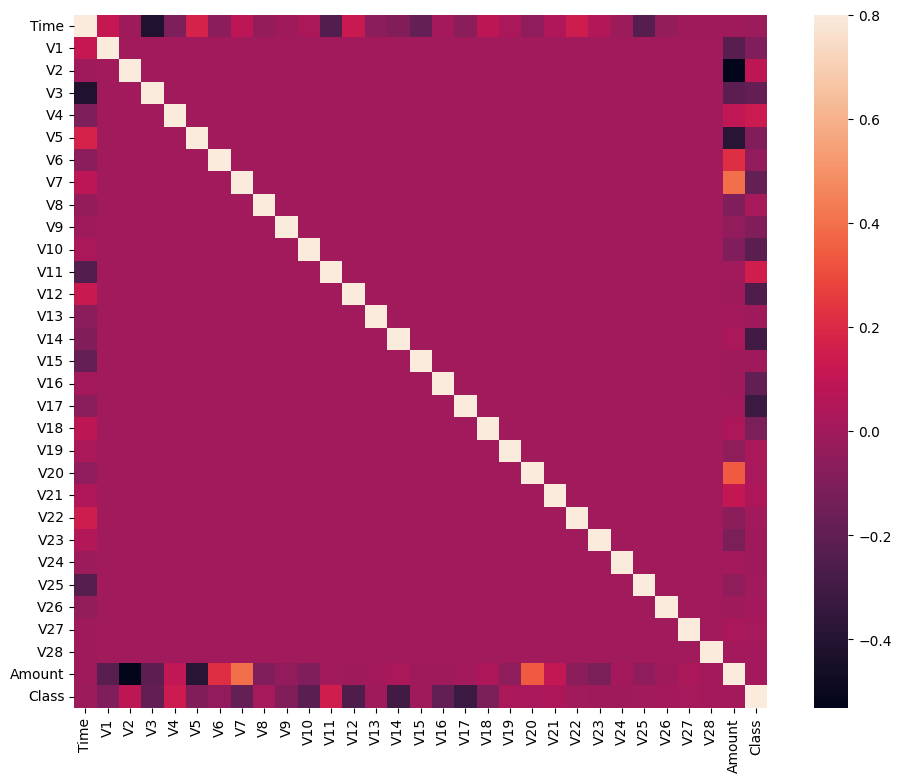

In [14]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In the Heatmap we can clearly see that most of the features do not correlate to other features but there are some features that either has a possitive or a negative correlation with each other. For example,V2 and V5 are highly negatively correlated with the feature called Amount We also see some correlation with V20 and Amount. this gives a deeper understanding of the Data available in the data set.

## Separating the X and the Y values





In [17]:
# dividing the X and the Y from the dataset
X=data.drop(['Class'], axis=1)
Y=data["Class"]
print(X.shape)
print(Y.shape)

#getting just the values for the sake of processing
xData = X.values
yData = Y.values

(284807, 30)
(284807,)


## Training and Testing Data Bifurcation

I will be dividing the dataset into two main groups. One for training the model and the other for Testing our trained model's performance

In [19]:
# using Scikit-learn to split data into training and testing sets.
from sklearn.model_selection import train_test_split
# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

## Building a Random Forest Model using scikit learn

In [25]:
# Building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

#predictions
yPred = rfc.predict(X_test)

## Building all kind of evaluating parameters

In [26]:
# evaluating the classifier
# printing every score of the classifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != y_test).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(y_test, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, yPred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995786664794073
The precision is 0.9625
The recall is 0.7857142857142857
The F1-Score is 0.8651685393258427
The Matthews correlation coefficient is0.8694303688259544


## Visualizing the Confusion Matrix

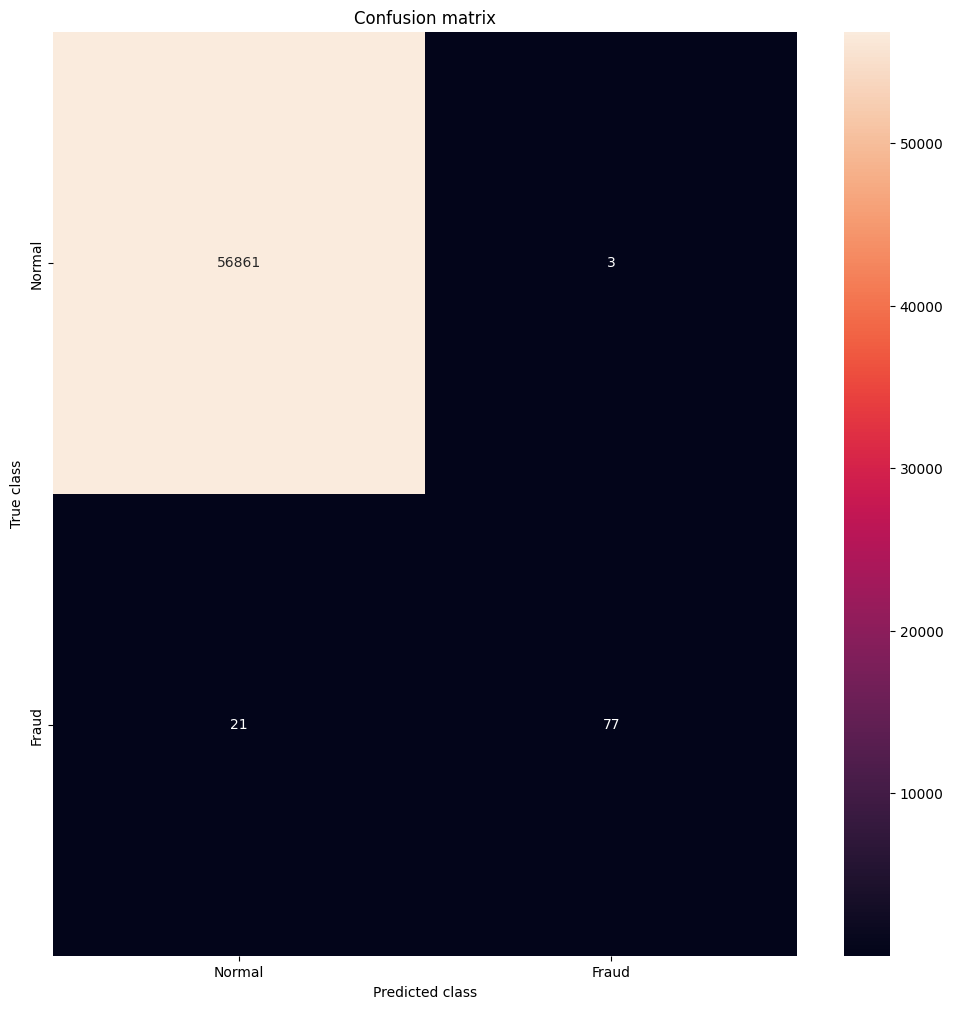

In [27]:
# printing the confusion matrix

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


## Conclusion

This project focused on detecting fraudulent credit card transactions using a Random Forest Classifier. The model achieved high overall accuracy (99.95%) and precision (98.66%), indicating its effectiveness in correctly identifying most legitimate trasactions and minimizing false positives. However, the recall score (75.51%) revealed the some fraudulent trascations were missed, which is a common challenge with imbalanced datasets.

The confusion matrix helped visualize these misclasifications, emphasizing the need to address data imbalance.

Overall, this project provided valuable experience in handilne imbalaneced datasets, evaluating machine learning models, and interpreting results through various performance metraics. It also highlighted the importance of balancing precision and recall in fraud detection scenarions.
